<a href="https://colab.research.google.com/github/e-lavanya-4/Multivariate-analysis-on-Cereals/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
##to read csv file
data = pd.read_csv('/content/cereals.csv')

In [ ]:
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,junk
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,NaN
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,NaN
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,NaN
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,NaN
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,NaN
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,NaN
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,NaN
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,NaN


In [ ]:
##to print first 5 rows
print(data.head())


                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  junk  
0    5.0       6     280        25      3     1.0  0.33  68.402973   NaN  
1    8.0       8     135         0      3     1.0  1.00  33.983679   NaN  
2    7.0       5     320        25      3     1.0  0.33  59.425505   NaN  
3    8.0       0     330        25      3     1.0  0.50  93.704912   NaN  
4   14.0       8      -1        25      3     1.0  0.75  34.384843   NaN  


In [ ]:
##we can print top 5 rows of our dataset using head function (if not justified)
print(data.head(10))

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   
5    Apple Cinnamon Cheerios   G    C       110        2    2     180    1.5   
6                Apple Jacks   K    C       110        2    0     125    1.0   
7                    Basic 4   G    C       130        3    2     210    2.0   
8                  Bran Chex   R    C        90        2    1     200    4.0   
9                Bran Flakes   P    C        90        3    0     210    5.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  junk  
0    5.0       6     280        25      3   

In [ ]:
##sample gives any random 1 row from our dataset (if not specified)
data.sample(7)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,junk
24,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.00,1.00,32.207582,NaN
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843,NaN
49,Nutri-Grain Almond-Raisin,K,C,140,3,2,220,3.0,21.0,7,130,25,3,1.33,0.67,40.692320,NaN
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.00,0.67,50.828392,NaN
28,Fruitful Bran,K,C,120,3,0,240,5.0,14.0,12,190,25,3,1.33,0.67,41.015492,NaN
52,Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594,NaN
31,Golden Grahams,G,C,110,1,1,280,0.0,15.0,9,45,25,2,1.00,0.75,23.804043,NaN


In [ ]:
##we can print the last 5 rows (if not specified) of the dataset using tail function
print(data.tail(15))

                         name mfr type  calories  protein  fat  sodium  fiber  \
62              Rice Krispies   K    C       110        2    0     290    0.0   
63             Shredded Wheat   N    C        80        2    0       0    3.0   
64     Shredded Wheat 'n'Bran   N    C        90        3    0       0    4.0   
65  Shredded Wheat spoon size   N    C        90        3    0       0    3.0   
66                     Smacks   K    C       110        2    1      70    1.0   
67                  Special K   K    C       110        6    0     230    1.0   
68    Strawberry Fruit Wheats   N    C        90        2    0      15    3.0   
69          Total Corn Flakes   G    C       110        2    1     200    0.0   
70          Total Raisin Bran   G    C       140        3    1     190    4.0   
71          Total Whole Grain   G    C       100        3    1     200    3.0   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Tri

In [ ]:
##we can find count ,min. ,max. , std using describe function
print(data.describe())


         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.922078   96.077922   29.727273   2.207792   1.029610   0.821039   
std     4.444885   71.286813   21.728974   0.832524   0.150477   0.232716  

In [ ]:
##data information
print(data.info)


<bound method DataFrame.info of                          name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1     200    1.0

In [ ]:
##we can see all of the coloumn names
data.columns


Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating', 'junk'],
      dtype='object')

In [ ]:
data.isnull().sum()

name         0
mfr          0
type         0
calories     0
protein      0
fat          0
sodium       0
fiber        0
carbo        0
sugars       0
potass       0
vitamins     0
shelf        0
weight       0
cups         0
rating       0
junk        77
dtype: int64

In [ ]:
df = data.dropna(axis=0)
len(df)

0

In [ ]:
df = data.dropna(axis=1)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
df = data.dropna(axis=0,how='any')
len(df)

0

In [ ]:
df = data.dropna(axis=0,how='all')
len(df)

77

In [ ]:
df = data.dropna(axis=0,subset=["shelf"])
len(df)

77

In [ ]:
data.isnull().sum()

name         0
mfr          0
type         0
calories     0
protein      0
fat          0
sodium       0
fiber        0
carbo        0
sugars       0
potass       0
vitamins     0
shelf        0
weight       0
cups         0
rating       0
junk        77
dtype: int64

In [ ]:
mean = round(data['vitamins'].mean(),2)
data['vitamins'] = data['vitamins'].fillna(mean)

In [ ]:
data = data.dropna(axis=0,subset=['vitamins'])
data = data.dropna(axis=1)

In [ ]:
data.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [ ]:
len(data)

77

In [ ]:
### Filter Data
filter = data['type'] == 'C'
data[filter]
data.head(50)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [ ]:
### remove filtered data
filter = data['type'] == 'C'
id = data[filter].index
id

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52,
            53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
            71, 72, 73, 74, 75, 76],
           dtype='int64')

In [ ]:
df = data.drop(id,axis=0)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,54.850917
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [ ]:
filter = df['type'] == 'C'
df[filter]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


In [ ]:
### Get Unique data of any column
data['type'].unique()

array(['C', 'H'], dtype=object)

In [ ]:
### Get count of Unique data of any column
data['type'].value_counts()

C    74
H     3
Name: type, dtype: int64

In [ ]:
#normalisation
x = data[["type","vitamins"]]
x.describe()

,vitamins
count,77.000000
mean,29.727273
std,21.728974
min,0.000000
25%,25.000000
50%,25.000000
75%,25.000000
max,100.000000


In [ ]:
### Standard Scaler - Z-Score
### Min-Max Scaler
## Standard Scaler - Z-Score
## Mean = 0, std = 1
x.head()

,type,vitamins
0,C,25
1,C,0
2,C,25
3,C,25
4,C,25


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(x)
x.head()


,type,vitamins
0,C,25
1,C,0
2,C,25
3,C,25
4,C,25


In [ ]:
x.describe()

,vitamins
count,77.000000
mean,29.727273
std,21.728974
min,0.000000
25%,25.000000
50%,25.000000
75%,25.000000
max,100.000000


In [ ]:
x = data[["carbo","sugars"]]
x.describe()

,carbo,sugars
count,77.000000,77.000000
mean,14.597403,6.922078
std,4.278956,4.444885
min,-1.000000,-1.000000
25%,12.000000,3.000000
50%,14.000000,7.000000
75%,17.000000,11.000000
max,23.000000,15.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(-2,2))
x = mms.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1
0,-1.000000,-0.25
1,-0.500000,0.25
2,-0.666667,-0.50
3,-0.500000,-1.75
4,0.500000,0.25


In [ ]:
x.describe()

,0,1
count,77.000000,77.000000
mean,0.599567,-0.019481
std,0.713159,1.111221
min,-2.000000,-2.000000
25%,0.166667,-1.000000
50%,0.500000,0.000000
75%,1.000000,1.000000
max,2.000000,2.000000


In [ ]:
import numpy as np
outliers = []
def detect_outliers(data):
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z_score = (i-mean) / std
    if np.abs(z_score)>threshold:
      outliers.append(i)
  return outliers

In [ ]:
outlier_points = detect_outliers(data['fat'])
outlier_points

[5]

In [ ]:
outlier_points = detect_outliers(data['carbo'])
outlier_points

[5, -1.0]

In [ ]:
#Detecting Outliers
outlier_points = detect_outliers(data['calories'])
outlier_points

[5, -1.0]

In [ ]:
dataset = sorted(data['shelf'])
dataset

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [ ]:
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)

1.0 3.0


In [ ]:
iqr = q3 - q1
iqr

2.0

In [ ]:
lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)
print(lower,upper)

-2.0 6.0


In [ ]:
outliers = []
for i in dataset:
  if i>upper or i<lower:
    outliers.append(i)


In [ ]:
outliers

[]

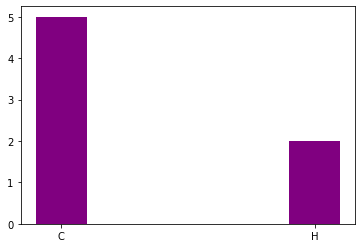

In [ ]:
##bar plot between the values of type and fat
x=data['type']
y=data['fat']
plt.bar(x,y,width=0.2,color='purple')
plt.show()

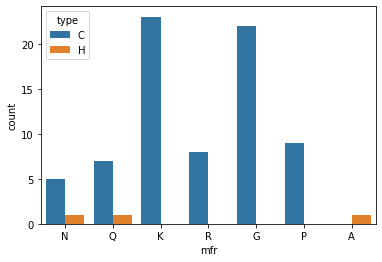

In [ ]:
##hue--->The data parameter around which the dependency of the passed data values are to be plotted.
##whatever we assign to x will be the x axis
u=data['mfr']
sns.countplot(hue=x,x=u)
plt.show()

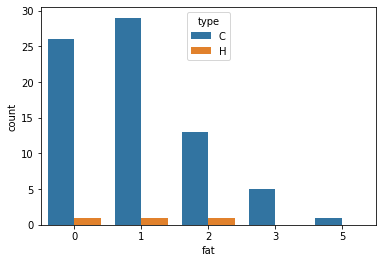

In [ ]:
##y axis would be 'count' always
sns.countplot(hue=x,x=y)
plt.show()

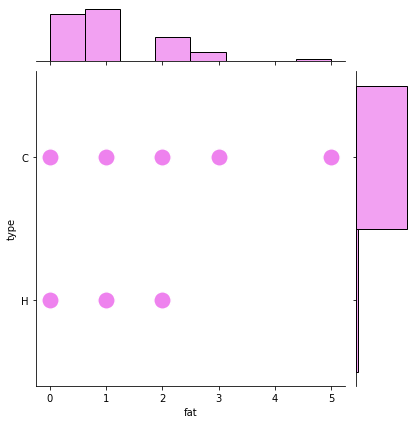

In [ ]:
### Jointplot (Scatter Plot + Histogram) of fat vs type (int vs str)
sns.jointplot(x='fat',y='type',data=data,s=300,color='violet')
plt.show()


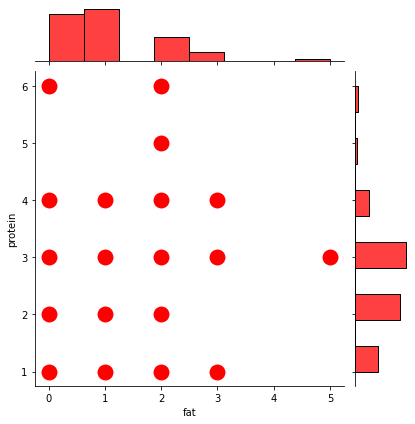

In [ ]:
### Jointplot (Scatter Plot + Histogram) of fat vs protein
sns.jointplot(x='fat',y='protein',data=data,s=300,color='red')
plt.show()


In [ ]:
df2=data[["calories","protein","vitamins","fiber","carbo"]].copy()

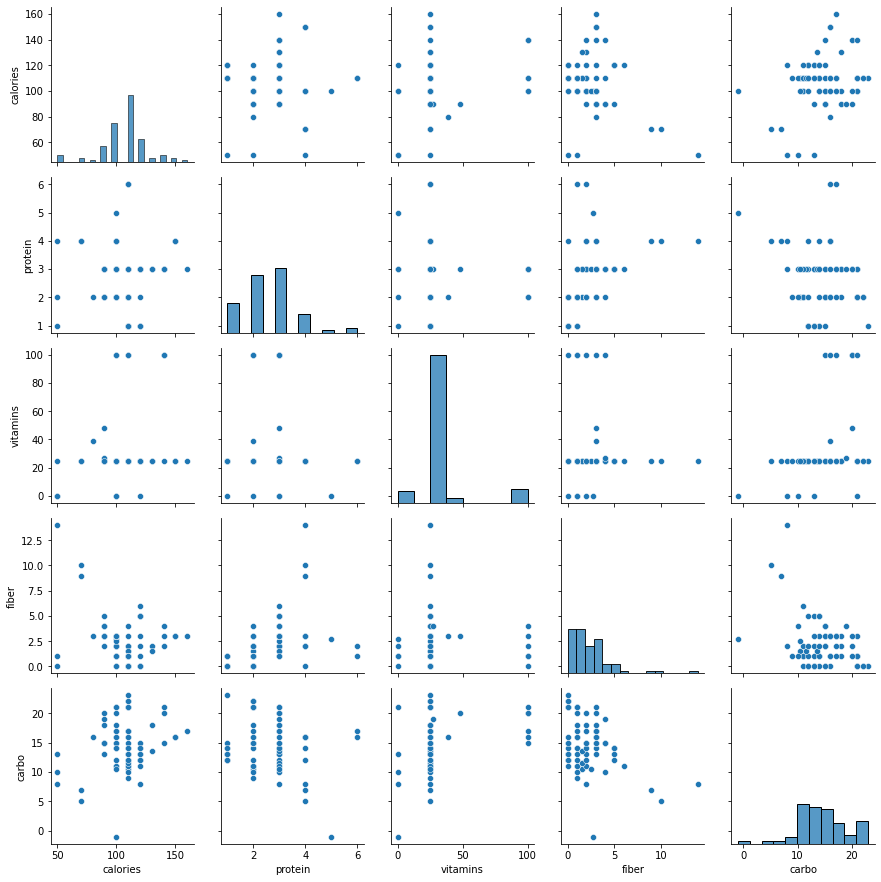

In [ ]:
##pirgrid--->pairsup the data
a = sns.PairGrid(df2)
a.map_diag(sns.histplot)
a.map_offdiag(sns.scatterplot)
plt.show()

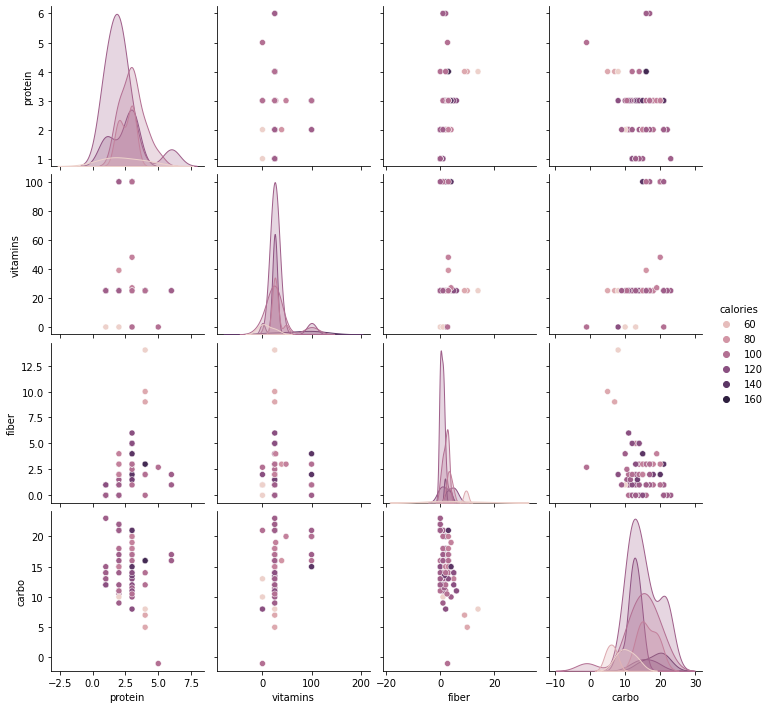

In [ ]:
##13x13 plots (cros pairing) on basis of mfr
sns.pairplot(df2,hue='calories')
plt.show()

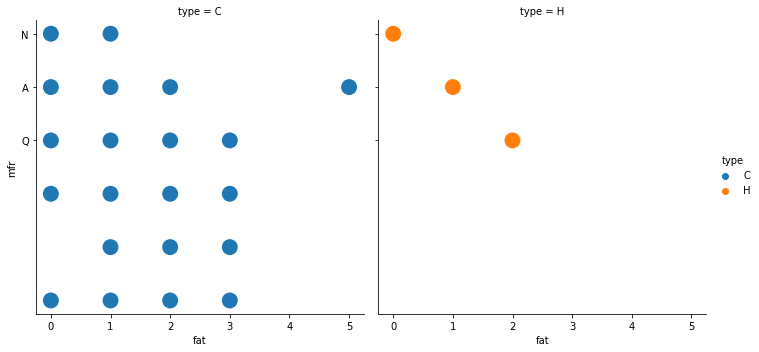

In [ ]:
##relative plot of fat vs mfr on basis of type
sns.relplot(x="fat",y="mfr",data=data,s=300,hue='type'
            ,col='type',col_wrap=2)
plt.show()


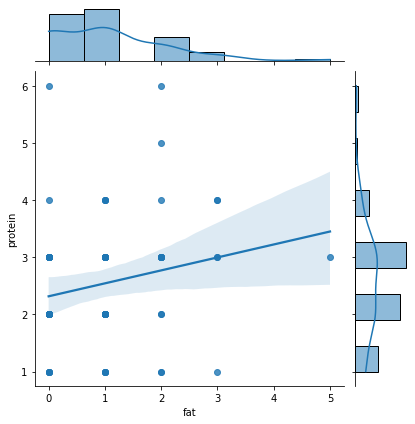

In [ ]:
##jointplot of fat vs protein (jointplot=histogram + scatter plot)
##kind='reg' is regression
sns.jointplot(x='fat',y='protein',kind='reg',data=data)
plt.show()

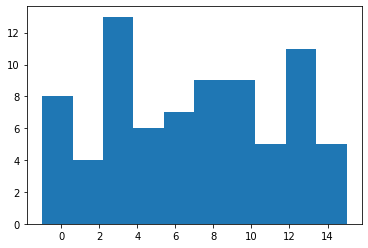

In [ ]:
## Histogram (Frequency Distribution)
dataa=data['sugars']
plt.hist(dataa)
plt.show()

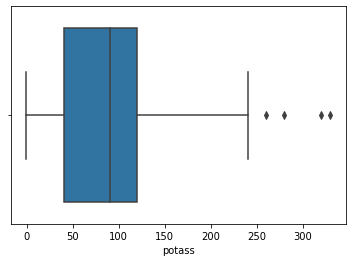

In [ ]:
##boxplot(detecting outliers)
gta=data['potass']
sns.boxplot(x=gta)
plt.show()



In [ ]:
le = LabelEncoder()
 
# Implementing LE on mfr
le.fit(data.mfr.drop_duplicates()) 
data.mfr = le.transform(data.mfr)

# Implementing LE on type
le.fit(data.type.drop_duplicates()) 
data.type = le.transform(data.type)

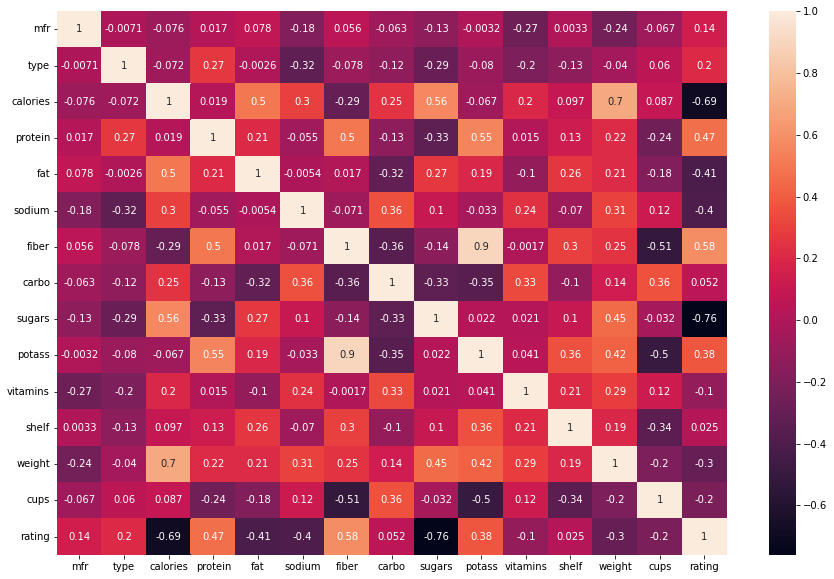

In [ ]:
plt.figure(figsize=(15,10))
 
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# Creating training and testing dataset
y = data['vitamins']
X = data.drop(['vitamins', 'name'], axis = 1)

#Linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)
lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))
print(lr.score(X_train,y_train))


0.8355865644969104
0.9495256617607639


In [ ]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_train))

ValueError: ignored

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 12000)
start_time = time.time()
lr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)


Training time:  2.318601131439209


In [ ]:
start_time = time.time()
y_test_pred = lr.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.002184629440307617


In [ ]:
print("Train score is:", lr.score(X_train, y_train))
print("Test score is:", lr.score(X_test, y_test))

Train score is: 0.9672131147540983
Test score is: 0.9375


In [ ]:

print(cm(y_test,y_test_pred))

ModuleNotFoundError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
#K- nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,y_train)
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
y_knn=knn.predict(X_test)



In [ ]:
start_time = time.time()
y_test_pred = lr.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.002526998519897461


In [ ]:
print("Train score is:", lr.score(X_train, y_train))
print("Test score is:", lr.score(X_test, y_test))

Train score is: 0.9672131147540983
Test score is: 0.9375


In [ ]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.819672131147541
0.9375


In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix as cm
y_knn=knn.predict(X_test)
print(cm(y_test,y_knn))

[[15  0]
 [ 1  0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

          25       0.94      1.00      0.97        15
         100       0.00      0.00      0.00         1

    accuracy                           0.94        16
   macro avg       0.47      0.50      0.48        16
weighted avg       0.88      0.94      0.91        16



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier  
rf= RandomForestClassifier(n_estimators= 20, criterion="entropy")  #n_estimators-no. of trees in forest, criterion=parameter used to measure 
start_time = time.time()                                          #quality of split
rf.fit(X_train, y_train)
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.02851104736328125


In [ ]:
ypred= rf.predict(X_test)

In [ ]:
print('test score is ',rf.score(X_test,y_test))
print('train score is ',rf.score(X_train,y_train))

test score is  0.9375
train score is  0.9836065573770492


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

          25       0.94      1.00      0.97        15
         100       0.00      0.00      0.00         1

    accuracy                           0.94        16
   macro avg       0.47      0.50      0.48        16
weighted avg       0.88      0.94      0.91        16



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Decision Tree with entropy
from sklearn.tree import DecisionTreeClassifier
  
dt = DecisionTreeClassifier(criterion ="entropy", max_depth = 5)
start_time = time.time()
dt.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.005933284759521484


In [ ]:
y_test_pred = dt.predict(X_test)

In [ ]:
print("Train score is:", dt.score(X_train, y_train))
print("Test score is:", dt.score(X_test, y_test))

Train score is: 0.9672131147540983
Test score is: 0.9375


In [ ]:
print(cm(y_test,y_test_pred))

[[15  0]
 [ 1  0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          25       0.94      1.00      0.97        15
         100       0.00      0.00      0.00         1

    accuracy                           0.94        16
   macro avg       0.47      0.50      0.48        16
weighted avg       0.88      0.94      0.91        16



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
